# Выявление определяющих успешность игры закономерностей.

Изучим данные, предоставленные сервисом для проекта.

## шаг. Открыть файл с данными и изучите общую информацию.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными в случае локальной работы и сохранение в df
try:
    df = pd.read_csv('E:\DS\games.csv')
# чтение файла с данными в случае работы online и сохранение в df
except:
    df = pd.read_csv('/datasets/games.csv') 

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 11 столбцов, есть пропуски в данных, разные типы данных, в названии столбцов - стилистические нарушения.<br/>
Обратимся к описанию данных:<br/>
<b>Name</b> — название игры;<br/>
<b>Platform</b> — платформа;<br/>
<b>Year_of_Release</b> — год выпуска;<br/>
<b>Genre</b> — жанр игры;<br/>
<b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий);<br/>
<b>EU_sales</b> — продажи в Европе (миллионы проданных копий);<br/>
<b>JP_sales</b> — продажи в Японии (миллионы проданных копий);<br/>
<b>Other_sales</b> — продажи в других странах (миллионы проданных копий);<br/>
<b>Critic_Score</b> — оценка критиков (максимум 100);<br/>
<b>User_Score</b> — оценка пользователей (максимум 10);<br/>
<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

**Вывод.**<br/>
Необходимо привести названия столбцов к стилистическому правилу, привести данные к нужным типам, обработать пропуски.

## шаг. Предобработка данных.

### Заменить названия столбцов (привести к нижнему регистру).

In [4]:
#приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработать пропуски при необходимости.

• • объяснить, как заполнили пропуски определённым образом или почему не стали это делать;
• • описать причины, которые могли привести к пропускам;
• • обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом, описать как его обработать;

In [5]:
#посмотрим на пропуски столбцов
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
columns = ['name', 'genre']

for i in columns:
    df[i] = df[i].fillna('')
     
df['rating'] = df['rating'].fillna('нет рейтинга')
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

Пропуски в столбцах пользовательские оценки и оценки критиков, а также рейтинг занимают 50% данных. Удаление этих пропусков исказит выводы по исследованию, а замена пропусков на нули исказит статистичесий анализ. В столбце год выпуска также не стоит производить замену на ноль. Поэтому было принято решение заменить пропуски в рейтинге, имени и жанре. А год выпуска и оценки оставим как есть.

In [7]:
df['rating'].unique()

array(['E', 'нет рейтинга', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Разберём подробнее аббревиатуры ретинга ESRB:<br/>

'E' - everyone «Для всех»: для возрастной категории от 6 лет,<br/> 
'M' - mature 17+ «Для взрослых»,<br/> 
'T' - teen «Подросткам»: для лиц от 13 лет,<br/> 
'E10+' - everyone 10+ «Для всех от 10 лет и старше»,<br/> 
'K-A' - kids to adults - старая аббревиатура оценки 'EC - early childhood', применялась в 1-й версии 1994 - 1996 гг. и 2-й версии 1996 - 1997 гг. С 2013 г. применяется 6-я версия логотипа 'EC',<br/> 
'AO' - adults only 18+ «Только для взрослых»,<br/>
'EC' - early childhood — «Для детей младшего возраста»: для детей от 3 лет,<br/> 
'RP' - rating panding «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.<br/>

Источники: https://www.esrb.org/ratings-guide/;<br/>
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#Действующие.

In [8]:
#сделаем замену значений стоблца
df = df.replace({'rating':{'K-A':'EC'}})

df['rating'].unique()

array(['E', 'нет рейтинга', 'M', 'T', 'E10+', 'EC', 'AO', 'RP'],
      dtype=object)

В задании упоминалось про значение 'tbd', найдём его и разберём что оно значит и чем его заменить.

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

https://analytics.infozone.pro/requirements-analysis/glossary-requirements-development-wiegers-2013/
TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [10]:
#заменим найденное значение на пропуск
df['user_score'] = df['user_score'].replace('tbd', '-100')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-100', '8.8', '6.9', '9.4',
       '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2',
       '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Привели названия столбцов к нижнему регистру, обнаружили пропуски и заменили их. В столбце рейтинг уместно заменили старое значение 'K-A' на сооответствующее текущей категрии и году. Значение 'tbd' также не несёт смысловой нагрузки для исследования и было заменено пропуск.

### Привести данные к нужным типам.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             16715 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df['user_score'] = df['user_score'].astype('float64')

#округлим и приведём все цифровые столбцы к целовчисленному типу данных
columns = ['na_sales',
           'eu_sales',
           'jp_sales',
           'other_sales',
           'critic_score',
           'user_score']

for i in columns:
    df[i] = (np.around(df[i])).astype('Int64')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null Int64
eu_sales           16715 non-null Int64
jp_sales           16715 non-null Int64
other_sales        16715 non-null Int64
critic_score       8137 non-null Int64
user_score         10014 non-null Int64
rating             16715 non-null object
dtypes: Int64(6), float64(1), object(4)
memory usage: 1.5+ MB


In [13]:
df['year_of_release'] = (np.around(df['year_of_release'])).astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41,29,4,8,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29,4,7,1,NaN,NaN,нет рейтинга
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,3,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,16,11,3,3,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,NaN,NaN,нет рейтинга


### Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [14]:
#добавим столбец с суммарными продажами во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41,29,4,8,76,8,E,82
1,Super Mario Bros.,NES,1985,Platform,29,4,7,1,NaN,NaN,нет рейтинга,41
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,3,82,8,E,36
3,Wii Sports Resort,Wii,2009,Sports,16,11,3,3,80,8,E,33
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,NaN,NaN,нет рейтинга,31


In [15]:
df.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating',
 'total_sales']

In [16]:
#поменяем порядок столбцов в датасете, для удобства
df = df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41,29,4,8,82,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29,4,7,1,41,NaN,NaN,нет рейтинга
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,3,36,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,16,11,3,3,33,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,31,NaN,NaN,нет рейтинга


**Вывод**

Привели названия столбцов к нижнему регистру, обнаружили и обработали пропуски. Расмотрели аббервиатуры столбца рейтинг ESRB.
Разобрали значение 'tbd'. Добавили в датасет столбец с суммарными проадажами, поставили его в наиболее удобное место и переходим к анализу.

## 3 шаг. Проанализировать данные.

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

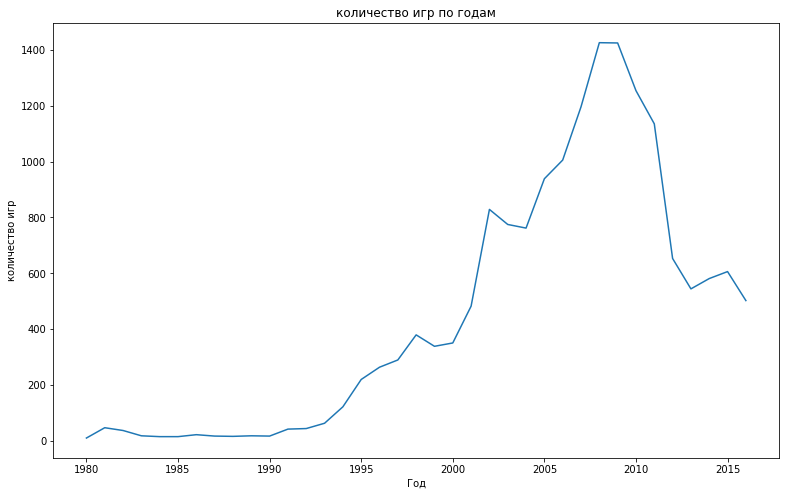

In [17]:
#посчитаем игры по годам
games_in_year = df.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
games_in_year.reset_index(drop=False, inplace=True)

plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_year, x = 'year_of_release', y = 'name')
    .set(title = 'количество игр по годам', xlabel = 'Год', ylabel = 'количество игр'))
plt.show()

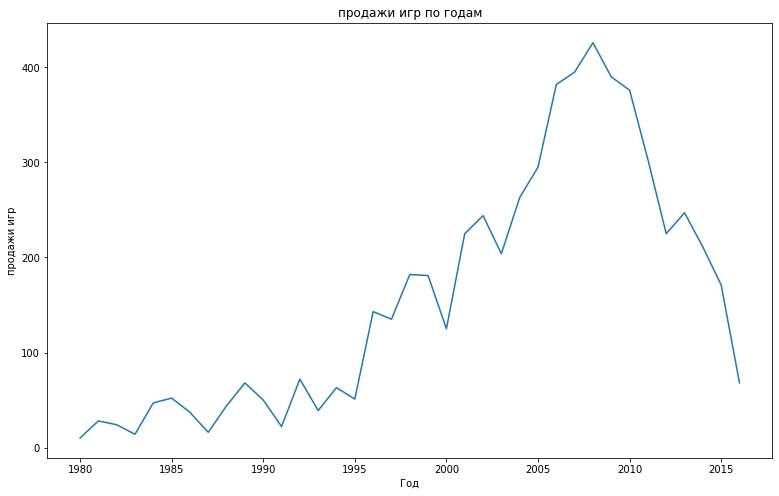

In [18]:
#посчитаем продажи игр по годам
games_in_total = df.pivot_table(index=['year_of_release'], values='total_sales', aggfunc='sum')
games_in_total.reset_index(drop=False, inplace=True)

plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_total, x = 'year_of_release', y = 'total_sales')
    .set(title = 'продажи игр по годам', xlabel = 'Год', ylabel = 'продажи игр'))
plt.show()

Что по количеству игр, что по продажам рост начинается с 2000 года.и спад идёт после 2010 года.

### Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41,29,4,8,82,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29,4,7,1,41,NaN,NaN,нет рейтинга
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,3,36,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,16,11,3,3,33,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,31,NaN,NaN,нет рейтинга


In [20]:
#сделаем таблицу с платформами и продажами
games_in_p = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
games_in_p.reset_index(drop=False, inplace=True)
games_in_p.sort_values(by=['total_sales'], ascending=False).head(10)

,platform,total_sales
16,PS2,801
28,X360,705
26,Wii,656
17,PS3,599
4,DS,505
15,PS,459
5,GB,243
11,NES,233
18,PS4,229
13,PC,173


Самые высокие продажи обнаружились у платформ PS2, X360, Wii, PS3, DS. Это как раз будут топ-5 платформ по продажам. Сделаем датасет с ними и посмотрим как распределялись продажи по годам.

In [21]:
#сделаем таблицу с платформами по годам и общим суммам
games_in_yp = df.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
games_in_yp.reset_index(drop=False, inplace=True)
games_in_yp.sort_values(by=['total_sales'], ascending=False).head()

,platform,year_of_release,total_sales
134,PS2,2004,152
200,Wii,2009,140
132,PS2,2002,135
218,X360,2010,133
197,Wii,2006,131


Теперь сделаем для каждой платформы таблички и представим на графике. Так мы сможем увидеть динамику продаж на конкретной платформе погодам.

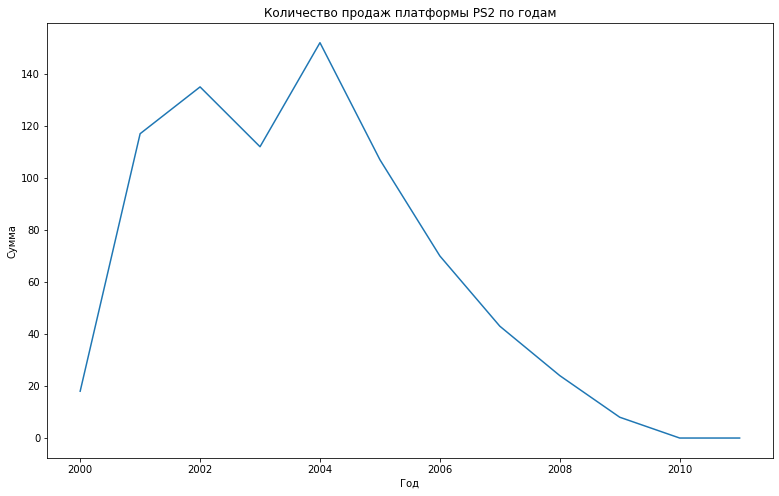

In [22]:
#для PS2
games_in_ps2 = games_in_yp.query("platform == 'PS2'")

#покажем на графике
plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_ps2, x = 'year_of_release', y = 'total_sales')
    .set(title = 'Количество продаж платформы PS2 по годам', xlabel = 'Год', ylabel = 'Сумма'))
plt.show()

Опять же виден пик на 2004 год, а после 2005 года идёт снижение в продажах.

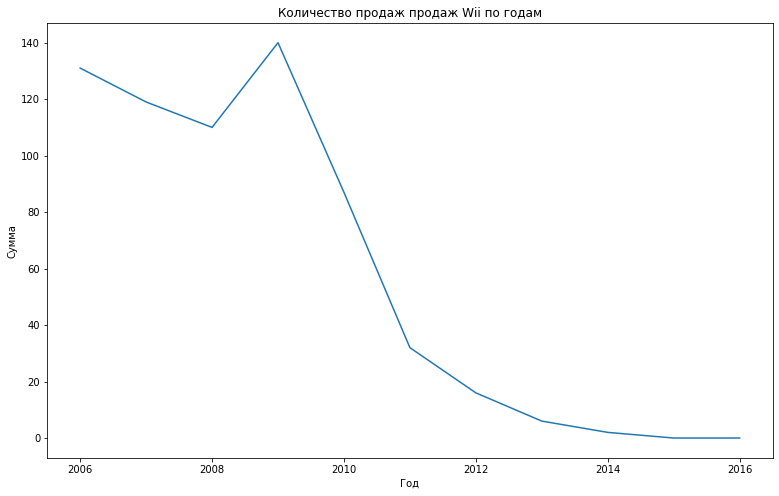

In [23]:
#для Wii
games_in_wii = games_in_yp.query("platform == 'Wii'")

#покажем на графике
plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_wii, x = 'year_of_release', y = 'total_sales')
    .set(title = 'Количество продаж продаж Wii по годам', xlabel = 'Год', ylabel = 'Сумма'))
plt.show()

У этой платформы пик по годам был в 2006 году и можно сказать в 2009. 2007, 2008 года показали продажи ниже, с 2010 года и вовсе упали.

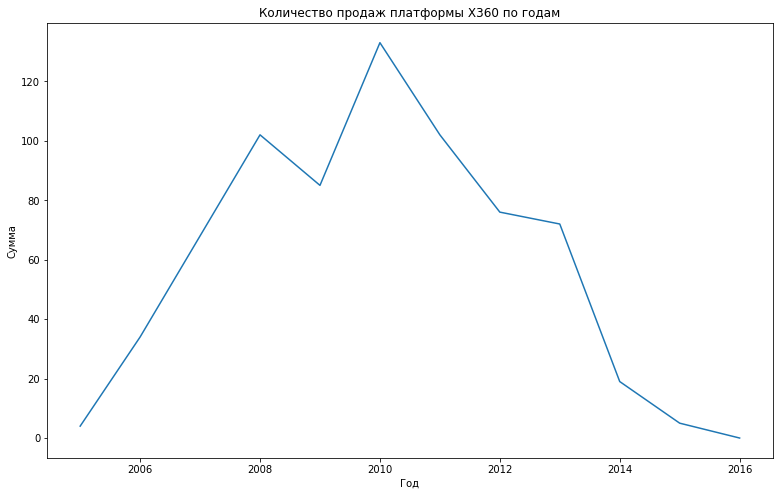

In [24]:
#для X360
games_in_X360 = games_in_yp.query("platform == 'X360'")

#покажем на графике
plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_X360, x = 'year_of_release', y = 'total_sales')
    .set(title = 'Количество продаж платформы X360 по годам', xlabel = 'Год', ylabel = 'Сумма'))
plt.show()

У данной платформы наоборот наблюдался рост к 2008 году, небольшое снижение в 2009 году и пик в 2010 году, далее снижение в продажах.

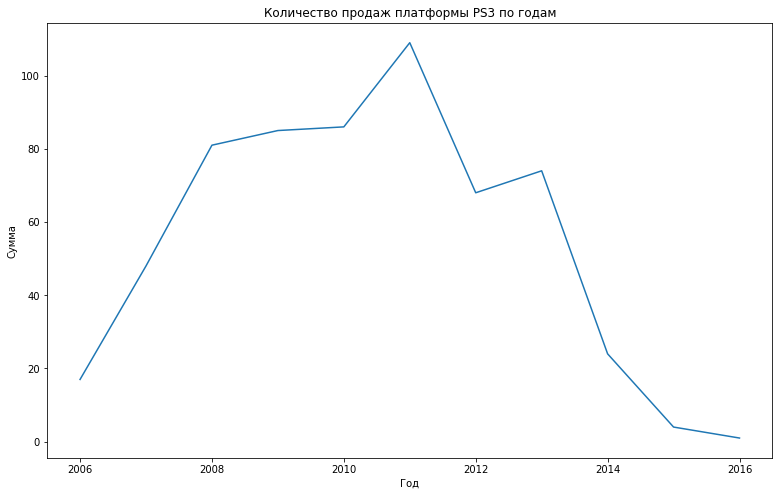

In [25]:
#для PS3
games_in_PS3 = games_in_yp.query("platform == 'PS3'")

#покажем на графике
plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_PS3, x = 'year_of_release', y = 'total_sales')
    .set(title = 'Количество продаж платформы PS3 по годам', xlabel = 'Год', ylabel = 'Сумма'))
plt.show()

На этой платформе виден резкий рост к 2008 году, и плавный рост к 2011 году. Затем достаточно резкое снижение продаж.

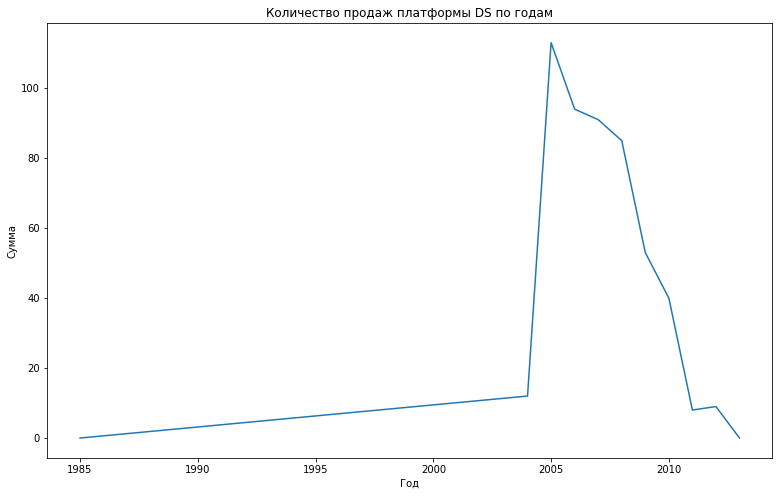

In [26]:
#для DS
games_in_DS = games_in_yp.query("platform == 'DS'")

#покажем на графике
plt.figure(figsize=(13, 8))
(sns.lineplot(data = games_in_DS, x = 'year_of_release', y = 'total_sales')
    .set(title = 'Количество продаж платформы DS по годам', xlabel = 'Год', ylabel = 'Сумма'))
plt.show()

У платформы DS идёт пик в 2005 год и плавное снижение с 2005 года. Единственный год с хорошими продажами - это 2005 год.

<body>
Вывод по топ-5 платформам.<br/>
У всех платформ есть определённые периоды по годам в пиках продаж:<br/>
у PS2 - это 2004 год,<br/> 
у X360 - это 2008-2010 года,<br/> 
у Wii - это 2006-2009 года,<br/> 
y PS3 - это 2008-2011 года,<br/> 
у DS - это 2005 год.<br/>
Значит, у топ-5 платформ самые доходные года по продажам это с 2009 года.
    </body>

### Самостоятельно определить актуальный период в результате исследования предыдущих вопросов.

Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.

В результате исследования предыдущих вопросов можно определить актуальный период у платформ - это период с 2013 года. Поскольку для исследования на 2017 год - старые периоды исказят прогноз, следует взять за актуальный период с 2013 года. Сделаем новый датасет с актуальным периодом и актуальными платформами.

In [27]:
#отсортируем датасет
df_a = df[(df['year_of_release'] > 2013)]
df_a.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6,6,0,2,14,NaN,NaN,нет рейтинга
42,Grand Theft Auto V,PS4,2014,Action,4,6,0,2,12,97,8,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4,3,3,1,11,NaN,NaN,нет рейтинга
77,FIFA 16,PS4,2015,Sports,1,6,0,1,8,82,4,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,3,3,0,1,7,NaN,NaN,нет рейтинга


### Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

Посмотрим на тотал продаж по платформам нового актуального периода.

In [28]:
#сделаем таблицу с платформами по годам и общим суммам
games_a = df_a.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
games_a.reset_index(drop=False, inplace=True)
games_a.sort_values(by=['total_sales'], ascending=False)

,platform,total_sales
3,PS4,207
9,XOne,93
0,3DS,57
2,PS3,29
7,WiiU,27
8,X360,24
1,PC,9
5,PSV,2
6,Wii,2
4,PSP,0


Определились платформы с высокими продажами: PS4, XOne, 3DS. Даже можно сказать явно высокие продажи у одной платформы - PS4.

### Постройть график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

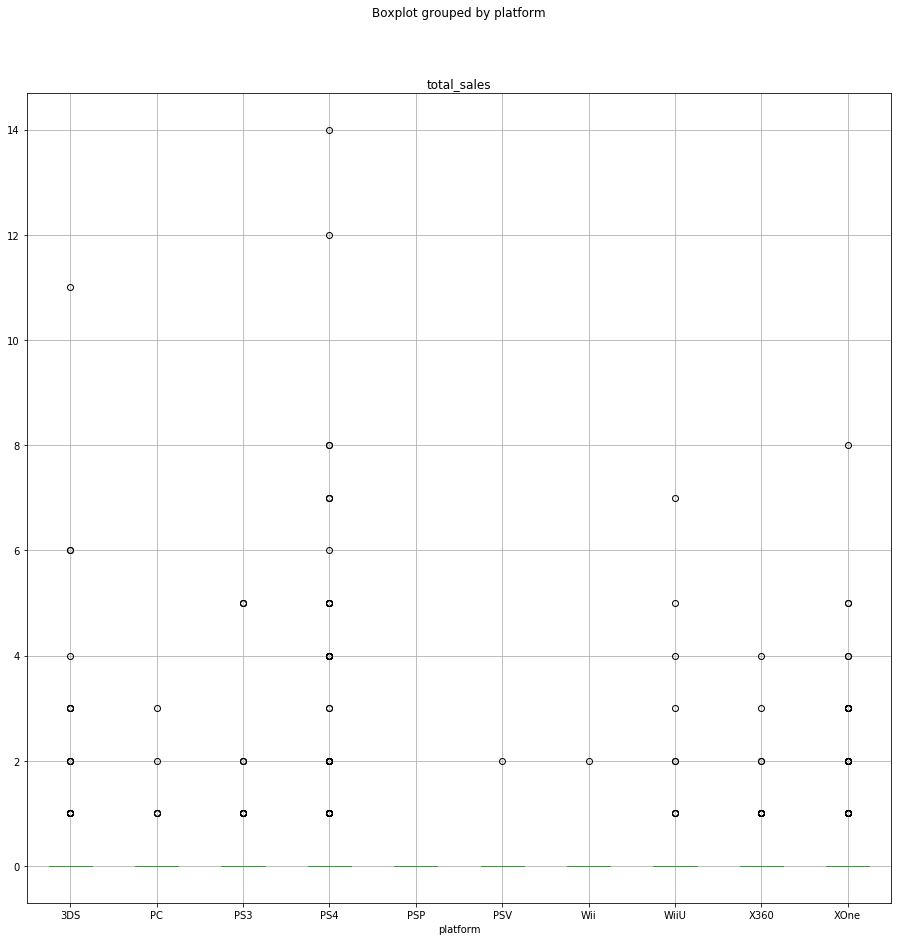

In [29]:
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

df_a.boxplot(column=('total_sales'), by='platform', figsize=(15,15))
plt.title='Диаграмма размаха по глобальным продажам игр в разбивке по платформам'

In [75]:
df_a['total_sales'].astype('float')
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 31 to 16714
Data columns (total 12 columns):
name               1596 non-null object
platform           1596 non-null object
year_of_release    1596 non-null Int64
genre              1596 non-null object
na_sales           1596 non-null Int64
eu_sales           1596 non-null Int64
jp_sales           1596 non-null Int64
other_sales        1596 non-null Int64
total_sales        1596 non-null Int64
critic_score       707 non-null Int64
user_score         888 non-null Int64
rating             1596 non-null object
dtypes: Int64(8), object(4)
memory usage: 174.6+ KB


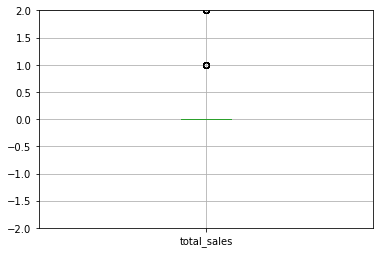

In [30]:
df_ps4 = df_a.query("platform == 'PS4'")
df_ps4.boxplot(['total_sales']) #для наглядности посмотрим на диаграмму размаха по платформе PS4
plt.ylim(-2,2)
plt.show()

In [31]:
df_ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,376.000000,376.000000,376.000000,376.0,376.000000,376.000000,237.000000,248.000000
mean,2015.236702,0.199468,0.281915,0.0,0.069149,0.550532,72.164557,4.258065
std,0.762336,0.611097,0.826425,0.0,0.274237,1.597531,12.214985,16.510024
min,2014.000000,0.000000,0.000000,0.0,0.000000,0.000000,19.000000,-100.000000
25%,2015.000000,0.000000,0.000000,0.0,0.000000,0.000000,66.000000,6.000000
50%,2015.000000,0.000000,0.000000,0.0,0.000000,0.000000,73.000000,7.000000
75%,2016.000000,0.000000,0.000000,0.0,0.000000,0.000000,80.000000,8.000000
max,2016.000000,6.000000,6.000000,0.0,2.000000,14.000000,97.000000,9.000000


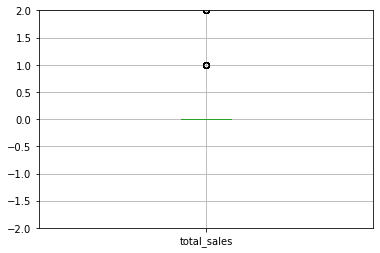

In [32]:
df_XOne = df_a.query("platform == 'XOne'")
df_XOne.boxplot(['total_sales']) #для наглядности посмотрим на диаграмму размаха по платформе XOne
plt.ylim(-2, 2)
plt.show()

In [33]:
df_XOne.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,155.000000,176.000000
mean,2015.114035,0.276316,0.127193,0.0,0.004386,0.407895,73.793548,-0.079545
std,0.799325,0.701138,0.394407,0.0,0.066227,1.043262,12.252589,25.909170
min,2014.000000,0.000000,0.000000,0.0,0.000000,0.000000,20.000000,-100.000000
25%,2014.000000,0.000000,0.000000,0.0,0.000000,0.000000,66.500000,6.000000
50%,2015.000000,0.000000,0.000000,0.0,0.000000,0.000000,76.000000,7.000000
75%,2016.000000,0.000000,0.000000,0.0,0.000000,0.000000,83.000000,8.000000
max,2016.000000,5.000000,2.000000,0.0,1.000000,8.000000,97.000000,9.000000


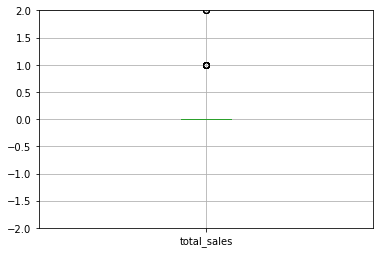

In [34]:
df_3DS = df_a.query("platform == '3DS'")
df_3DS.boxplot(['total_sales']) #для наглядности посмотрим на диаграмму размаха по платформе 3DS
plt.ylim(-2, 2)
plt.show()

In [35]:
df_3DS.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,51.000000,76.000000
mean,2014.839623,0.075472,0.042453,0.146226,0.004717,0.268868,68.980392,-22.473684
std,0.755853,0.428778,0.263210,0.544107,0.068680,1.100785,12.858445,48.241745
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,-100.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.500000,-100.000000
50%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,7.000000
75%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.500000,8.000000
max,2016.000000,4.000000,3.000000,3.000000,1.000000,11.000000,90.000000,9.000000


Как видно у всех этих платформмедиана и 75% квартиль в нуле. Это видно и по статистическим данным, значения далеко небольшие попали в этот ппериод. Это и как раз обосновывает общий график, который мы строили выше, по которому виден спад приблизительно после 2012 года.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

    Определим самой популярной платформой PS4, и проанализируем её. Но предварительно нужно очистить датасет от значений -100, которыми мы ранее заменили значение tbd.

In [36]:
df_t = df_a.query('user_score == -100')
df_tp = df_t.pivot_table(index='year_of_release', values='user_score', aggfunc='count')
df_tp

,user_score
year_of_release,
2014,21
2015,38
2016,34


Проверили, действительно, таких значений 83. Они нам исказят исследование

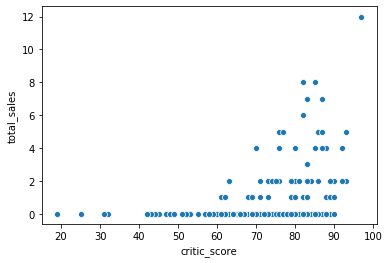

In [37]:
#уберём из датасета ненужные значения
df_a = df_a.query('user_score != -100')

#покажем на графике
sns.scatterplot(data=df_a.query("platform == 'PS4'"), y="total_sales", x="critic_score")
#plt.title('Влияние отзывов критиков на количество продаж платформы PS4')
plt.show()

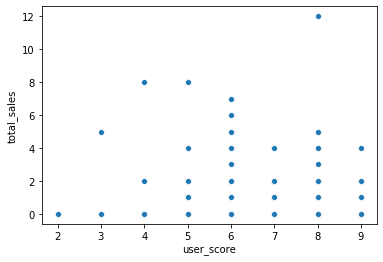

In [38]:
#покажем на графике
sns.scatterplot(data=df_a.query("platform == 'PS4'"), y="total_sales", x="user_score")
#plt.title('Влияние отзывов пользователей на количество продаж платформы PS4')
plt.show()

При сравнении продаж с отзывами критиков и пользователей выявляется общая зависимость - с увеличением балла отзыва - увеличиваются и продажи.

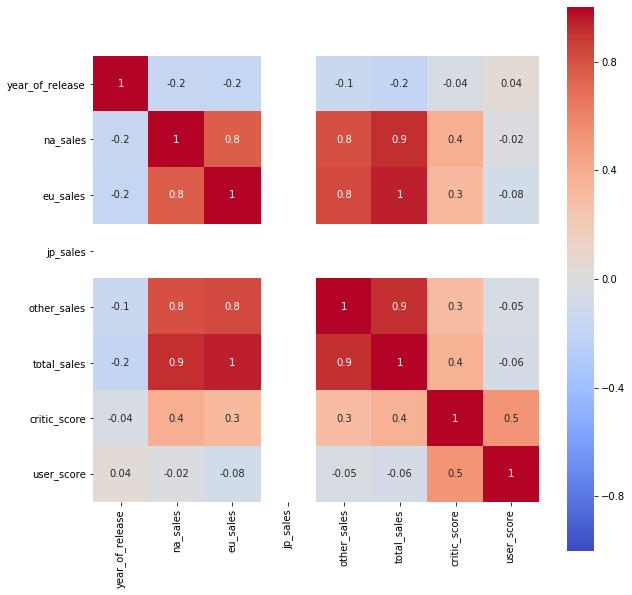

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_a.query("platform == 'PS4'").corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

Корреляция между продажами и отзывами пользователей очень слабая, между продажами и отзывами критиков больше.

### Соотнести выводы с продажами игр на других платформах.

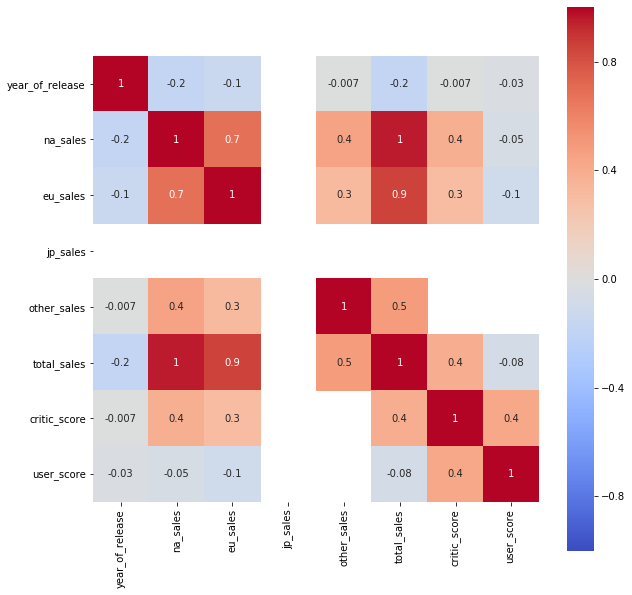

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_a.query("platform == 'XOne'").corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

По платформе XOne зависимость продаж от оценки критиков больше - 0,4, тогда как от пользователей -0,08

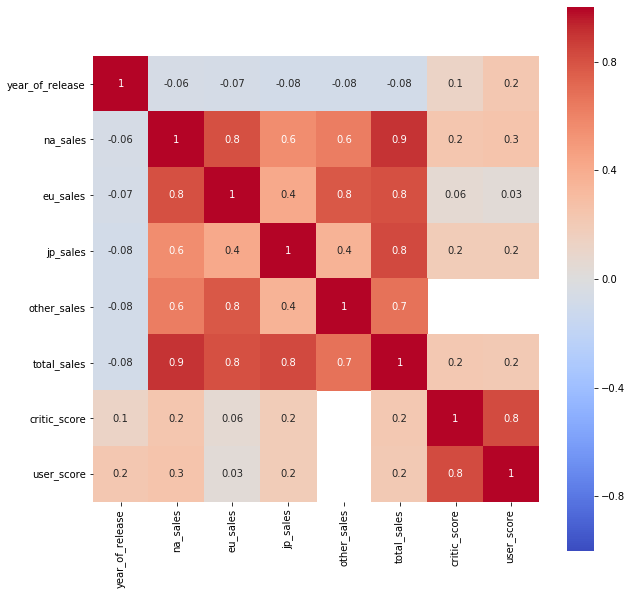

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_a.query("platform == '3DS'").corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

По платформе 3DS зависимость продаж от оценки критиков и пользователей одинаковая - 0,2

Общий вывод по всем платформам такой: зависимость продаж от оценки критиков больше, чем от оценки пользователей.

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [42]:
genre = df_a.pivot_table(index=['genre'], values='total_sales', aggfunc='sum')
genre.reset_index(drop=False, inplace=True)
genre.sort_values(by=['total_sales'], ascending=False)

,genre,total_sales
8,Shooter,136
0,Action,97
10,Sports,75
7,Role-Playing,63
3,Misc,20
2,Fighting,16
6,Racing,16
4,Platform,13
9,Simulation,8
1,Adventure,4


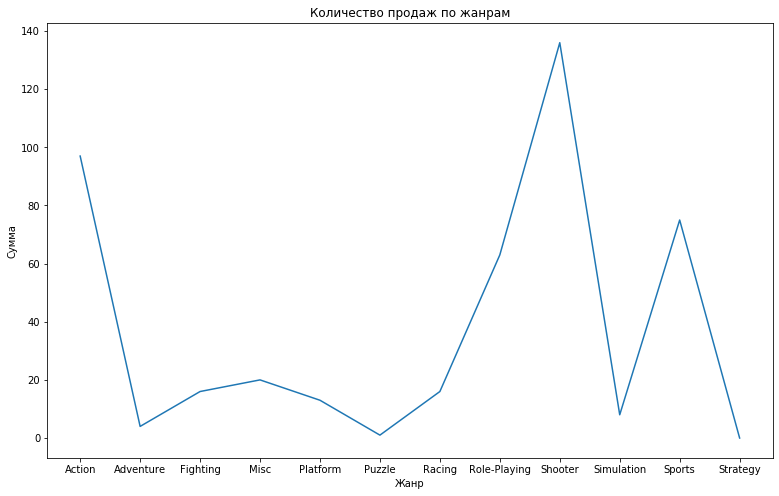

In [43]:
plt.figure(figsize=(13, 8))
(sns.lineplot(data = genre, x = 'genre', y = 'total_sales')
    .set(title = 'Количество продаж по жанрам', xlabel = 'Жанр', ylabel = 'Сумма'))
plt.show()

Самыми прибыльными жанрами являются Action, Shooter и Sports.

In [44]:
df_a.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.00000,1596.000000,707.000000,888.000000
mean,2014.942356,0.126566,0.112155,0.022556,0.02005,0.281328,72.462518,6.612613
std,0.800743,0.483219,0.483537,0.211263,0.14889,1.055418,12.170167,1.624481
min,2014.000000,0.000000,0.000000,0.000000,0.00000,0.000000,19.000000,0.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.00000,0.000000,66.000000,6.000000
50%,2015.000000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,7.000000
75%,2016.000000,0.000000,0.000000,0.000000,0.00000,0.000000,81.000000,8.000000
max,2016.000000,6.000000,6.000000,3.000000,2.00000,14.000000,97.000000,9.000000


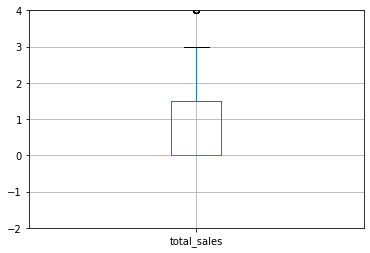

In [45]:
df_shooter = df_a.query("genre == 'Shooter'")
df_shooter.boxplot(['total_sales']) 
plt.ylim(-2, 4)
plt.show()

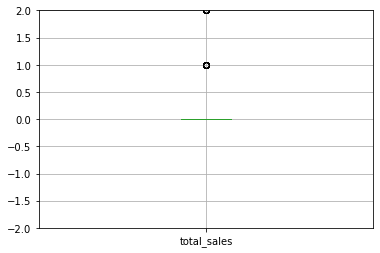

In [46]:
df_Sports = df_a.query("genre == 'Sports'")
df_Sports.boxplot(['total_sales']) 
plt.ylim(-2, 2)
plt.show()

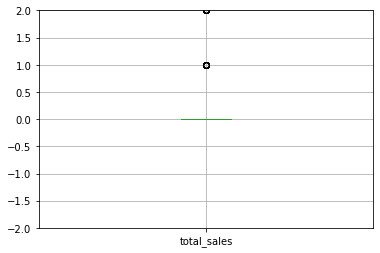

In [47]:
df_Action = df_a.query("genre == 'Action'")
df_Action.boxplot(['total_sales']) 
plt.ylim(-2, 2)
plt.show()

Единственный жанр, это Shooter, в котором показались значения от 0 до 3 на диаграмме размаха. Остальные значения очень  низкие. Такие значения не позволяют выявить медиану и средние продажи.

**Вывод**

<body>
    Большее количество игр приходится после 2000 года.<br/> 
    Самые высокие продажи обнаружились у платформ PS4, XOne, 3DS в период после 2010 года. Эти платформы и были определены в актуальный период как топ платформ по продажам.<br/>
    Определили самой популярной платформой PS4.<br/>
    По всем платформам зависимость продаж от оценки критиков больше, чем от оценки пользователей.<br/>
Больше всего по всем платформам лидирует жанр Shooter, далее идёт Sports и Action.
    </body>

## шаг. Составить портрет пользователя каждого региона и определить для пользователя каждого региона (NA, EU, JP).

Подготовим таблички для каждого региона.

In [48]:
#для региона NA сделаем полную табличку
na = df_a.drop(columns=['eu_sales', 'jp_sales', 'other_sales'], axis=1) 
na.info()
na.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 31 to 16714
Data columns (total 9 columns):
name               1596 non-null object
platform           1596 non-null object
year_of_release    1596 non-null Int64
genre              1596 non-null object
na_sales           1596 non-null Int64
total_sales        1596 non-null Int64
critic_score       707 non-null Int64
user_score         888 non-null Int64
rating             1596 non-null object
dtypes: Int64(5), object(4)
memory usage: 132.5+ KB


,name,platform,year_of_release,genre,na_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6,14,NaN,NaN,нет рейтинга
42,Grand Theft Auto V,PS4,2014,Action,4,12,97,8,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4,11,NaN,NaN,нет рейтинга
77,FIFA 16,PS4,2015,Sports,1,8,82,4,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,3,7,NaN,NaN,нет рейтинга


In [49]:
#для региона NA сделаем мини-табличку с нужными столбцами и посчитаем долю
na_p = na.pivot_table(index=['platform'], values=['na_sales', 'total_sales'], aggfunc='sum')
na_p.reset_index(drop=False, inplace=True)

#добавим столбец с долей
fmt='{:.0%}'.format
na_p['na_share_sales'] = (na_p['na_sales'] / na_p['total_sales']).map(fmt)

na_p.head()

,platform,na_sales,total_sales,na_share_sales
0,3DS,16,57,28%
1,PC,2,9,22%
2,PS3,11,29,38%
3,PS4,75,207,36%
4,PSP,0,0,nan%


(-1.2644641121860807,
 1.1873205720193543,
 -1.1238618115534407,
 1.1572944872670317)

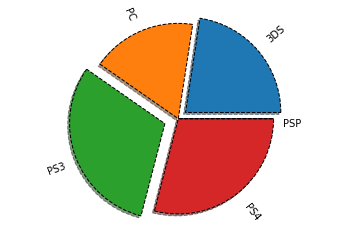

In [50]:
#покажем на графике регион Северная Америка
vals = [28, 22, 38, 36, 0]

labels = ["3DS", "PC", "PS3", "PS4", "PSP"]

explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [51]:
#для региона EU сделаем полную табличку
eu = df_a.drop(columns=['na_sales', 'jp_sales', 'other_sales'], axis=1) 
eu.info()
eu.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 31 to 16714
Data columns (total 9 columns):
name               1596 non-null object
platform           1596 non-null object
year_of_release    1596 non-null Int64
genre              1596 non-null object
eu_sales           1596 non-null Int64
total_sales        1596 non-null Int64
critic_score       707 non-null Int64
user_score         888 non-null Int64
rating             1596 non-null object
dtypes: Int64(5), object(4)
memory usage: 132.5+ KB


,name,platform,year_of_release,genre,eu_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6,14,NaN,NaN,нет рейтинга
42,Grand Theft Auto V,PS4,2014,Action,6,12,97,8,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3,11,NaN,NaN,нет рейтинга
77,FIFA 16,PS4,2015,Sports,6,8,82,4,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,3,7,NaN,NaN,нет рейтинга


In [52]:
#для региона EU сделаем мини-табличку с нужными столбцами и посчитаем долю
eu_p = eu.pivot_table(index=['platform'], values=['eu_sales', 'total_sales'], aggfunc='sum')
eu_p.reset_index(drop=False, inplace=True)

#добавим столбец с долей
fmt='{:.0%}'.format
eu_p['eu_share_sales'] = (eu_p['eu_sales'] / eu_p['total_sales']).map(fmt)

eu_p.head()

,platform,eu_sales,total_sales,eu_share_sales
0,3DS,9,57,16%
1,PC,7,9,78%
2,PS3,15,29,52%
3,PS4,106,207,51%
4,PSP,0,0,nan%


(-1.2367712374380948,
 1.2078830760808015,
 -1.199166650489001,
 1.1270779556567547)

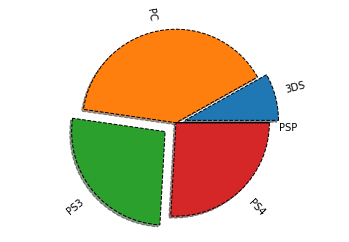

In [53]:
#покажем на графике регион Европа
vals = [16, 78, 52, 51, 0]

labels = ["3DS", "PC", "PS3", "PS4", "PSP"]

explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [54]:
#для региона JP сделаем полную табличку
jp = df_a.drop(columns=['eu_sales', 'na_sales', 'other_sales'], axis=1) 
jp.info()
jp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 31 to 16714
Data columns (total 9 columns):
name               1596 non-null object
platform           1596 non-null object
year_of_release    1596 non-null Int64
genre              1596 non-null object
jp_sales           1596 non-null Int64
total_sales        1596 non-null Int64
critic_score       707 non-null Int64
user_score         888 non-null Int64
rating             1596 non-null object
dtypes: Int64(5), object(4)
memory usage: 132.5+ KB


,name,platform,year_of_release,genre,jp_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0,14,NaN,NaN,нет рейтинга
42,Grand Theft Auto V,PS4,2014,Action,0,12,97,8,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3,11,NaN,NaN,нет рейтинга
77,FIFA 16,PS4,2015,Sports,0,8,82,4,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,0,7,NaN,NaN,нет рейтинга


In [55]:
#для региона JP сделаем мини-табличку с нужными столбцами и посчитаем долю
jp_p = jp.pivot_table(index=['platform'], values=['jp_sales', 'total_sales'], aggfunc='sum')
jp_p.reset_index(drop=False, inplace=True)

#добавим столбец с долей
fmt='{:.0%}'.format
jp_p['jp_share_sales'] = (jp_p['jp_sales'] / jp_p['total_sales']).map(fmt)

jp_p.head()

,platform,jp_sales,total_sales,jp_share_sales
0,3DS,31,57,54%
1,PC,0,9,0%
2,PS3,0,29,0%
3,PS4,0,207,0%
4,PSP,0,0,nan%


(-1.2125000000000001, 1.2625, -1.1, 1.1)

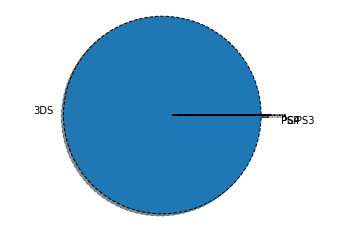

In [56]:
#покажем на графике регион Япония
vals = [54, 0, 0, 0, 0]

labels = ["3DS", "PC", "PS3", "PS4", "PSP"]

explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

В Европе лидирует PC, в Северной Америке PS3, а в Японии 3DS.

### Самые популярные платформы (топ-5), описать различия в долях продаж.

In [57]:
#сделаем табличку с платформами и долями по каждому региону
jp_pp = jp_p.drop(columns=['jp_sales', 'total_sales'], axis=1)
eu_pp = eu_p.drop(columns=['eu_sales', 'total_sales'], axis=1)
na_pp = na_p.drop(columns=['na_sales', 'total_sales'], axis=1)

reg = jp_pp.merge(eu_pp, on=['platform'], how='outer')
reg = reg.merge(na_pp, on=['platform'], how='outer')
reg.head()

,platform,jp_share_sales,eu_share_sales,na_share_sales
0,3DS,54%,16%,28%
1,PC,0%,78%,22%
2,PS3,0%,52%,38%
3,PS4,0%,51%,36%
4,PSP,nan%,nan%,nan%


(-1.2125000000000001, 1.2625, -1.1, 1.1)

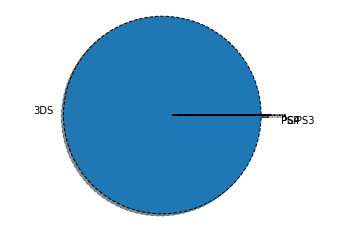

In [58]:
#покажем на графике регион Япония
vals = [54, 0, 0, 0, 0]

labels = ["3DS", "PC", "PS3", "PS4", "PSP"]

explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.2367712374380948,
 1.2078830760808015,
 -1.199166650489001,
 1.1270779556567547)

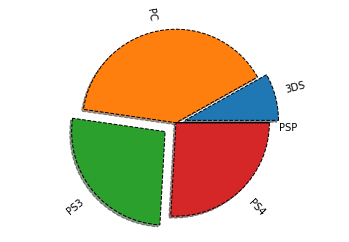

In [59]:
#покажем на графике регион Европа
vals = [16, 78, 52, 51, 0]

labels = ["3DS", "PC", "PS3", "PS4", "PSP"]

explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.2644641121860807,
 1.1873205720193543,
 -1.1238618115534407,
 1.1572944872670317)

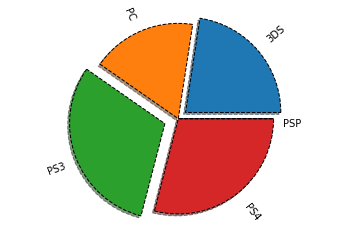

In [60]:
#покажем на графике регион Северная Америка
vals = [28, 22, 38, 36, 0]

labels = ["3DS", "PC", "PS3", "PS4", "PSP"]

explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

<body>
В Японии самая высокая доля продаж у 3DS, у остальных платформ 0.<br/>
В Европе самая высокая доля продаж у PС.<br/>
В Северной Америке лидирует PS3.

### Самые популярные жанры (топ-5), пояснить разницу.

Покажем самые прибыльные жанры в каждом регионе.

In [61]:
#В регионе NA
na_g = na.pivot_table(index=['genre'], values='total_sales', aggfunc='sum')
na_g.reset_index(drop=False, inplace=True)
na_g.sort_values(by=['total_sales'], ascending=False).head()

,genre,total_sales
8,Shooter,136
0,Action,97
10,Sports,75
7,Role-Playing,63
3,Misc,20


In [62]:
#В регионе EA
eu_g = eu.pivot_table(index=['genre'], values='total_sales', aggfunc='sum')
eu_g.reset_index(drop=False, inplace=True)
eu_g.sort_values(by=['total_sales'], ascending=False).head()

,genre,total_sales
8,Shooter,136
0,Action,97
10,Sports,75
7,Role-Playing,63
3,Misc,20


In [63]:
#В регионе JP
jp_g = jp.pivot_table(index=['genre'], values='total_sales', aggfunc='sum')
jp_g.reset_index(drop=False, inplace=True)
jp_g.sort_values(by=['total_sales'], ascending=False).head()

,genre,total_sales
8,Shooter,136
0,Action,97
10,Sports,75
7,Role-Playing,63
3,Misc,20


По всем регионам в лидерах жанры Shooter, Action, Sports.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [64]:
#сделаем табличку по критериям рейтинга попавшим в три региона, для дальнейшей визуализации на графике
df_pie = df_a.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc= ['sum'])
df_pie.reset_index(drop=False, inplace=True)
df_pie

rating      sum                  
                eu_sales jp_sales na_sales
0             E       44        4       44
1          E10+        6        1       10
2             M       72        0       82
3             T       19        4       23
4  нет рейтинга       38       27       43

(-1.1194091841848544,
 1.1009242523672715,
 -1.1064154924407288,
 1.1009106919311944)

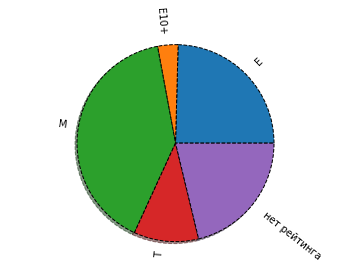

In [65]:
#покажем на графике регион Северная Америка
vals = [44, 6, 72, 19, 38]

labels = ["E", "E10+", "M", "T", "нет рейтинга"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.1203341768646662,
 1.1009682965610492,
 -1.1203341768450388,
 1.1009682955656805)

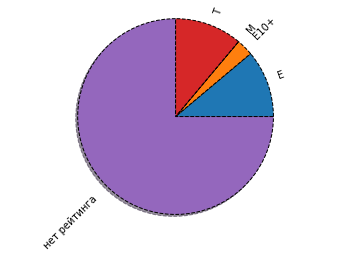

In [66]:
#покажем на графике регион Япония
vals = [4, 1, 0, 4, 27]

labels = ["E", "E10+", "M", "T", "нет рейтинга"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.1185535060799496,
 1.1008835002895214,
 -1.114096236194851,
 1.1175695631142168)

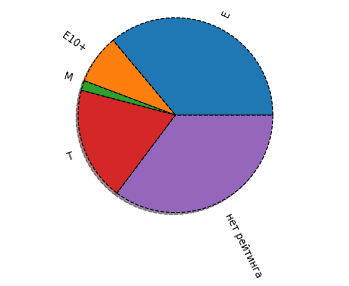

In [67]:
#покажем на графике регион Европа
vals = [44, 10, 2, 23, 43]

labels = ["E", "E10+", "M", "T", "нет рейтинга"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

Во всех трёх регионах достаточно весомая доля выпала на "нет рейтинга". 
По регионам Северная Америка лидирует рейтинг 'M' - mature 17+ «Для взрослых», в Европе - 'E' - everyone «Для всех»: для возрастной категории от 6 лет, в Японии доля равномерно распределилась на 'E' - everyone «Для всех»: для возрастной категории от 6 лет и 'T' - teen «Подросткам»: для лиц от 13 лет. 

In [68]:
#Посмотрим на влияние рейтинга на продажи в каждом регионе: выведем среднее значение, дисперсию и стандартное отколонение
df_arr = df_a.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc= ['mean', 'var','std'])
df_arr.reset_index(drop=False, inplace=True)
df_arr.head()

rating      mean                           var                      \
                 eu_sales  jp_sales  na_sales  eu_sales  jp_sales  na_sales   
0             E  0.231579  0.021053  0.231579  0.644500  0.020718  0.252966   
1          E10+  0.038961  0.006494  0.064935  0.037688  0.006494  0.100331   
2             M  0.275862  0.000000  0.314176  0.454377  0.000000  0.477837   
3             T  0.074510  0.015686  0.090196  0.100726  0.039123  0.137502   
4  нет рейтинга  0.051630  0.036685  0.058424  0.119780  0.076203  0.182977   

        std                      
   eu_sales  jp_sales  na_sales  
0  0.802808  0.143939  0.502957  
1  0.194133  0.080582  0.316751  
2  0.674075  0.000000  0.691257  
3  0.317373  0.197795  0.370813  
4  0.346092  0.276050  0.427758

<body>
Статистические выводы по критериям.<br/>
'E' - everyone «Для всех»: для возрастной категории от 6 лет:<br/>
по всем трём регионам отклонение дисперсии от среднего арифметического не значительное - изменчивость слабая, а стандартное отклонение от дисперсии в значительной разнице - значит и выбросов может быть много.<br/> 
    
'E10+' - everyone 10+ «Для всех от 10 лет и старше»:<br/>
по всем трём регионам дисперсия от среднего арифметического в небольшой разнице, а вот стандартное отклонение от дисперсии по всем трём регионам даёт размах в значениях. Возможен выброс.<br/>

'M' - mature 17+ «Для взрослых»:<br/>
в этой категории отклонение дисперсии от среднего арифметического только по региону Европа и Северная Америка, стандартное отклонение от дисперсии не значительное. А вот регион Япония показал нули по всем параметрам.<br/>

'T' - teen «Подросткам»: для лиц от 13 лет:<br/>
по всем трём регионам отклонение дисперсии от среднего арифметического незначительное, стандартное отклолнение от дисперсии значительное.

**Вывод**

<body>
Портрет пользователя каждого региона:<br/>
В Японии самая высокая доля продаж у 3DS, у остальных платформ 0.<br/>
В Европе самая высокая доля продаж у PС.<br/>
В Северной Америке лидирует PS3.<br/>

По всем регионам в лидерах жанры Shooter, Action, Sports.<br/>

Во всех трёх регионах достаточно весомая доля выпала на "нет рейтинга". 
По регионам Северная Америка лидирует рейтинг 'M' - mature 17+ «Для взрослых», в Европе - 'E' - everyone «Для всех»: для возрастной категории от 6 лет, в Японии доля равномерно распределилась на 'E' - everyone «Для всех»: для возрастной категории от 6 лет и 'T' - teen «Подросткам»: для лиц от 13 лет. 

## шаг. Проверить гипотезы.

Пороговое значение *alpha* задать самостоятельно.<br/>
Пояснить:<br/>
Как сформулирована нулевая и альтернативная гипотезы.<br/>
Какой критерий применён для проверки гипотез и почему.<br/>

Пороговое значение *alpha* задано из следующих рассуждений: если не жизни людей спасаем, то берем стандартные 5%. *В медицинских задачах и вообще везде, где точность предельно важна и высока цена ошибки, то принято 1, максимум 3%*

### Средние пользовательские рейтинги платформ XOne и PC одинаковые.

<body>
    Сформулируем гипотезы.<br/>
Нулевая гипотеза: "Средние пользовательские рейтинги платформ XOne и PC одинаковые.<br/>
Альтернативная гипотеза: "Средние пользовательские рейтинги платформ XOne и PC не одинаковые."<br/>
Возьмём обычный уровень статистической значимости *P≤0,05*. Его можно интерпретировать так: "получен статистически значимый результат".
    </body>

In [69]:
#подготовим табличку только с интересующими плтаформами 
df_pp = df_a.query("platform == ['XOne', 'PC']")

df_ppr = df_pp.pivot_table(index='platform', values=['user_score'], aggfunc= ['sum', 'mean', 'var','std'])
df_ppr.reset_index(drop=False, inplace=True)
df_ppr.head()

,platform,sum,mean,var,std
,,user_score,user_score,user_score,user_score
0,PC,768,6.295082,3.168405,1.780002
1,XOne,1086,6.581818,2.000887,1.414527


Среднее арифметическое, дисперсия и стандартное отклонение у двух платформ близки по значениям. Значит в статистическом тесте, *equal_var = False - параметр, задающий не считать равными дисперсии выборок*, применять не будем.

In [70]:
#поскольку у нас были сохранены пропуски в значениях, то прежде чем делать статистический тест, 
#пропуски нужно удалить из датасета именно в нужном столбце - с пользовательскими оценками.
p_pc = df_pp[(df_pp['platform'] == 'PC')]['user_score'] #выборка по платформе PC
p_pc = p_pc.dropna().reset_index(drop=True)
p_pc.dtypes
p_pc.unique()

p_xone = df_pp[(df_pp['platform'] == 'XOne')]['user_score'] #выборка по платформе XOne
p_xone = p_xone.dropna().reset_index(drop=True)
p_xone.dtypes
p_xone.unique()

<IntegerArray>
[8, 5, 6, 4, 7, 3, 9, 2]
Length: 8, dtype: Int64

In [71]:
p_pc

p_xone

alpha = .05 #критический уровень статистической значимости

res = st.ttest_ind(
      p_pc,
      p_xone)

print('р-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.12966530116991629
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<body>
    Сформулируем гипотезы.<br/>
Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.<br/>
Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".<br/>
Возьмём обычный уровень статистической значимости *P≤0,05*. Его можно интерпретировать так: "получен статистически значимый результат".
    </body>

In [72]:
#подготовим табличку только с интересующими плтаформами 
df_genre = df_a.query("genre == ['Action', 'Sports']")

df_genre_m = df_genre.pivot_table(index='genre', values=['user_score'], aggfunc= ['sum', 'mean', 'var','std'])
df_genre_m.reset_index(drop=False, inplace=True)
df_genre_m.head()

,genre,sum,mean,var,std
,,user_score,user_score,user_score,user_score
0,Action,2013,6.777778,2.065315,1.437120
1,Sports,661,5.204724,3.545057,1.882832


Среднее арифметическое и дисперсия у двух жанров отличаются, а вот стандартное отклонение почти одинаковое. Значит параметр *equal_var = False* зададим при проведении теста.

In [73]:
#поскольку у нас были сохранены пропуски в значениях, то прежде чем делать статистический тест, 
#пропуски нужно удалить из датасета именно в нужном столбце - с пользовательскими оценками.
action = df_genre[(df_genre['genre'] == 'Action')]['user_score'] #выборка по жанру Action
action = action.dropna().reset_index(drop=True)
action.dtypes
action.unique()

sports = df_genre[(df_genre['genre'] == 'Sports')]['user_score'] #выборка по жанру Sports
sports = sports.dropna().reset_index(drop=True)
sports.dtypes
sports.unique()

<IntegerArray>
[4, 5, 6, 7, 3, 8, 2, 9, 1, 0]
Length: 10, dtype: Int64

In [74]:
action

sports

alpha = .05 #критический уровень статистической значимости

res = st.ttest_ind(
      action,
      sports,
      equal_var = False) #параметр, задающий не считать равными дисперсии выборок

print('р-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 8.494576417641397e-15
Отвергаем нулевую гипотезу


Итак, в ходе проведённого анализа выявлено, что пользовательские оценки по платформам XOne и PC одинаковые, и нулевая гипотеза не отвергнута. А вот средние пользовательские рейтинги жанров action и sports разные, что и подтвердил тест.

### шаг. Написать общий вывод.

<body>
Выявлены определяющие успешность игры закономерности:<br/>
1. зависимость продаж от оценки критиков больше, чем от оценки пользователей;<br/>
2. рейтинг ERSB влияет на продажи;<br/>
3. продажи той или иной игры зависят также от региона;<br/>    
4. как показало исследование по всем регионам в лидерах жанры игр Shooter, Action, Sports.<br/>
 Поэтому при прогнозировании на 2017 год следует учесть популярные платформы - Shooter, Action, Sports, а также особенности каждого региона.
    </body>